# MiBiPreT example: NA screening using Griftpark data

## Background: Griftpark contaminant site

Text to be added.

## Data Analysis

Text to be added.

In [1]:
#!pip install mibiscreen

Command optional when package is not pip-installed:

In [4]:
import mibiscreen.analysis.sample.screening_NA as na
from mibiscreen.data.check_data import standardize
from mibiscreen.data.load_data import load_csv
from mibiscreen.visualize.activity import activity

### Data handling

**Load in data:**

Returns loaded data as DataFrame. Will be reported when verbose flag is `True`. 

In [5]:
file_path = './grift_BTEXIIN.csv'
data_raw,units = load_csv(file_path,verbose=False)

**Standardization of input data:**

Runs all checks on data, i.e. column names, units and values in one go and returns transformed data with standard column names and valueas in numerical type where possible. Data is reduced to those columns containing known quantities.

In [6]:
data,units = standardize(data_raw, reduce = True, verbose=False)

________________________________________________________________
________________________________________________________________
________________________________________________________________
________________________________________________________________


### Natural Attenuation (NA) Screening

Performing NA screening step by step.

**Calculation of number of electrons for reduction**
                                    
Returns pandas-Series with total amount of electron reductors per well in [mmol e-/l]:

In [7]:
tot_reduct = na.reductors(data,verbose = True,ea_group = 'ONSFe')

 Running function 'reductors()' on data
________________________________________________________________
________________________________________________________________
Total amount of electron reductors per well in [mmol e-/l] is:
1     17.012271
2     13.866108
3      1.942974
4           NaN
5      0.092681
6      0.749220
7      0.416233
8      6.576483
9     10.600622
10    19.823788
11     3.303222
12    14.755178
13     3.552962
14     7.344570
15    11.340408
16    14.210188
17    11.822679
18    17.483449
19     0.915713
20          NaN
21     1.165453
22     0.851334
23     2.406377
24    21.861353
25     2.156417
26     0.056677
Name: total_reductors, dtype: float64
----------------------------------------------------------------


**Calculation of number of electrons needed for oxidation**
                                    
Returns pandas-Series with total amount of oxidators per well in [mmol e-/l]:

In [8]:
tot_oxi = na.oxidators(data,verbose = True, contaminant_group='BTEXIIN')

 Running function 'oxidators()' on data
Total amount of oxidators per well in [mmol e-/l] is:
1     0.025176
2     0.044319
3     1.566300
4     3.700510
5     3.006575
6     2.096408
7     1.096832
8     0.610001
9     0.071837
10    0.009147
11    0.007641
12    3.388206
13    0.193936
14    3.509553
15    0.227017
16    0.008771
17    0.011823
18    0.044319
19    3.271534
20    4.455531
21    3.750462
22    3.185337
23    5.040701
24    0.081200
25    0.006903
26    0.010263
Name: total_oxidators, dtype: float64
-----------------------------------------------------


**Calculation of number of electron balance**
                                    
Returns pandas-Series with ratio of reductors to oxidators. If value below 1, available electrons for reduction are not sufficient for reaction and thus NA is potentially not taking place.

In [9]:
e_bal = na.electron_balance(data,verbose = True)

 Running function 'electron_balance()' on data
________________________________________________________________
________________________________________________________________
Electron balance e_red/e_cont is:
1      671.244878
2      311.807766
3        1.222417
4             NaN
5        0.027688
6        0.357383
7        0.379487
8       10.781105
9      147.170115
10    2156.883586
11     424.871202
12       4.324237
13      18.028367
14       2.087360
15      49.870815
16    1604.049198
17     992.768354
18     392.577247
19       0.279903
20            NaN
21       0.310749
22       0.261343
23       0.462417
24     268.452423
25     308.824841
26       2.757824
Name: e_balance, dtype: float64
---------------------------------


**Calculation of "traffic light" based on electron balance**
                                    
Returns pandas-Series with traffic light (red/yellow/green) if NA is taking place based on electron balance. Red corresponds to a electron balance below 1 where available electrons for reduction are not sufficient and thus NA is potentially not taking place.

In [10]:
na_traffic = na.NA_traffic(data,verbose = True)

 Running function 'NA_traffic()' on data
________________________________________________________________
________________________________________________________________
Evaluation if natural attenuation (NA) is ongoing:
--------------------------------------------------
Red light: Reduction is limited at 7 out of 26 locations
Green light: Reduction is limited at 17 out of 26 locations
Yellow light: No decision possible at 2 out of 26 locations
________________________________________________________________


### Evaluation of intervention threshold exceedance

**Calculation of total concentration of contaminants/specified group of contaminants**
                                    
Returns pandas-Series with total concentrations of contaminants per well in [ug/l]:

In [11]:
tot_cont = na.total_contaminant_concentration(data,verbose = True,contaminant_group='BTEXIIN')

 Running function 'total_contaminant_concentration()' on data
Total concentration of BTEXIIN in [ug/l] is:
1        66.0
2       116.0
3      4101.0
4      9657.0
5      7839.0
6      5449.0
7      2822.0
8      1595.0
9       184.0
10       24.0
11       20.0
12     8983.0
13      498.0
14     9224.0
15      593.0
16       23.0
17       31.0
18      116.0
19     8542.0
20    11695.0
21     9804.0
22     8306.0
23    13132.0
24      211.1
25       18.1
26       26.9
Name: total_contaminants, dtype: float64
--------------------------------------------------


**Calculation of "traffic light" for threshold exceedance**

Returns pandas-DataFrame (similar to input data, including well specification) with intervention threshold exceedance analysis:
* traffic light if well requires intervention (red/yellow/green)
* number of contaminants exceeding the intervention value
* list of contaminants above the threshold of intervention

In [12]:
na_intervention = na.thresholds_for_intervention(data,verbose = True,contaminant_group='BTEXIIN')
#na.thresholds_for_intervention?
display(na_intervention)

 Running function 'thresholds_for_intervention()' on data
Evaluation of contaminant concentrations exceeding intervention values for BTEXIIN:
------------------------------------------------------------------------------------
Red light: Intervention values exceeded for 16 out of 26 locations
green light: Concentrations below intervention values at 10 out of 26 locations
Yellow light: No decision possible at 0 out of 26 locations
________________________________________________________________


,sample_nr,obs_well,intervention_traffic,intervention_number,intervention_contaminants
1,2019-031-001,"A-32mm-52,5",green,0,[]
2,2019-031-002,"A-32mm-65,5",green,0,[]
3,2019-031-009,B-MLS1-3-12,red,4,"[benzene, ethylbenzene, indane, naphthalene]"
4,2019-031-011,"B-MLS1-5-15,5",red,6,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
5,2019-031-012,B-MLS1-6-17,red,6,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
6,2019-031-013,B-MLS1-7-19,red,5,"[benzene, ethylbenzene, pm_xylene, indane, nap..."
7,2019-031-014,"B-MLS2-1-20,5",red,7,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
8,2019-031-018,B-MLS2-5-28,red,6,"[benzene, ethylbenzene, o_xylene, indane, inde..."
9,2019-031-020,B-MLS2-7-31,green,0,[]
10,2019-031-004,B-32mm44-45,green,0,[]


### Natural Attenuation (NA) Screening in one go

Performing complete NA screening and evaluation of intervention threshold exceedance.
                                    
Returns pandas-DataFrame (including well specification from input data) with NA screening results and intervention threshold exceedance analysis:
* total amount of electron reductors per well in [mmol e-/l]
* total amount of oxidators per well in [mmol e-/l]
* electron balance, ratio of reductors to oxidators
* NA - traffic light (red/yellow/green) if NA is taking place based on electron balance
* total concentrations of contaminants per well in [ug/l]
* Intervention traffic light per well (red/yellow/green)
* number of contaminants exceeding the intervention value
* list of contaminants above the threshold of intervention

In [13]:
data_na = na.screening_NA(data,verbose = True)

 Running function 'screening_NA()' on data
 Runs all checks on data: column names, units and values
 Running function 'reductors()' on data
________________________________________________________________
________________________________________________________________
Total amount of electron reductors per well in [mmol e-/l] is:
1     16.899063
2     13.818939
3      1.914672
4           NaN
5      0.083247
6      0.749220
7      0.416233
8      6.576483
9     10.572320
10    19.729448
11     3.246618
12    14.651405
13     3.496358
14     7.325702
15    11.321540
16    14.068678
17    11.737773
18    17.398543
19     0.915713
20          NaN
21     1.165453
22     0.832466
23     2.330905
24    21.798385
25     2.131846
26     0.028304
Name: total_reductors, dtype: float64
----------------------------------------------------------------
 Running function 'oxidators()' on data
Total amount of oxidators per well in [mmol e-/l] is:
1     0.025176
2     0.044319
3     1.566300
4     3.7

In [14]:
display(data_na)

,sample_nr,obs_well,total_reductors,total_oxidators,e_balance,na_traffic_light,total_contaminants,intervention_traffic,intervention_number,intervention_contaminants
1,2019-031-001,"A-32mm-52,5",16.899063,0.025176,671.244878,green,66.0,green,0,[]
2,2019-031-002,"A-32mm-65,5",13.818939,0.044319,311.807766,green,116.0,green,0,[]
3,2019-031-009,B-MLS1-3-12,1.914672,1.566300,1.222417,green,4101.0,red,4,"[benzene, ethylbenzene, indane, naphthalene]"
4,2019-031-011,"B-MLS1-5-15,5",NaN,3.700510,NaN,y,9657.0,red,6,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
5,2019-031-012,B-MLS1-6-17,0.083247,3.006575,0.027688,red,7839.0,red,6,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
6,2019-031-013,B-MLS1-7-19,0.749220,2.096408,0.357383,red,5449.0,red,5,"[benzene, ethylbenzene, pm_xylene, indane, nap..."
7,2019-031-014,"B-MLS2-1-20,5",0.416233,1.096832,0.379487,red,2822.0,red,7,"[benzene, ethylbenzene, pm_xylene, o_xylene, i..."
8,2019-031-018,B-MLS2-5-28,6.576483,0.610001,10.781105,green,1595.0,red,6,"[benzene, ethylbenzene, o_xylene, indane, inde..."
9,2019-031-020,B-MLS2-7-31,10.572320,0.071837,147.170115,green,184.0,green,0,[]
10,2019-031-004,B-32mm44-45,19.729448,0.009147,2156.883586,green,24.0,green,0,[]


### Activity plot

Create activity plot linking contaminant concentration to metabolite occurence based on NA screening

________________________________________________________________
________________________________________________________________


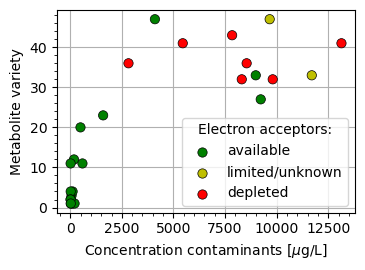

In [15]:
### run full NA screening with results added to data
na.screening_NA(data,inplace = True,verbose = False)

fig, ax = activity(data)#,save_fig='grift_NA_activity.png',dpi = 300)
